# Introduction to Text Identification

Part 1

Comparing the Data between these 3 authors:

    Jules Verne (http://www.gutenberg.org/ebooks/author/60 )
    Jane Austen (http://www.gutenberg.org/ebooks/author/68 )
    L. Frank Baum (http://www.gutenberg.org/ebooks/author/42)


Part 1 Visualization:

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from yellowbrick.text import TSNEVisualizer
import os
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
from sklearn.metrics import accuracy_score

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [2]:
directory = 'Training'
dirs = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory,d))]

In [3]:
corpus = []
labels = []
for directory in dirs: 
    books = os.listdir(f'Training/{directory}')
    for book in books:
        labels.append(directory)
        all_words = ''
        with open(f'Training/{directory}/{book}','r',encoding='utf-8') as f:
            for line in f:
                all_words += line
        corpus.append(all_words)

In [4]:
vectorizer = TfidfVectorizer(stop_words='english')
tfid_vect_results = vectorizer.fit_transform(corpus)

In [ ]:
pca_results = PCA(n_components=2).fit_transform(tfid_vect_results.toarray())

[[-0.28073346 -0.33018991]
 [-0.27105073 -0.33316677]
 [-0.30439932 -0.33873216]
 [-0.30975137 -0.39868176]
 [ 0.4498929   0.02531968]
 [ 0.60053749  0.01228354]
 [ 0.59846538 -0.00267145]
 [ 0.55761382  0.00430825]
 [-0.3282717   0.61362776]
 [-0.24605514 -0.01924699]
 [-0.33226097  0.65406999]
 [-0.1339869   0.11307983]]


In [6]:
color_map = {'Baum':'red','Austen':'green','Verne':'blue'}
text_map= {'Baum': 'L. Frank Baum', 'Austen': 'Jane Austen', 'Verne': 'Jules Verne'}

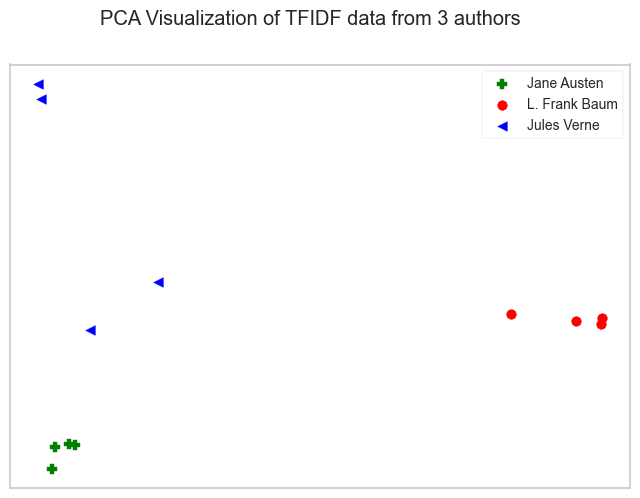

In [7]:
fig, ax = plt.subplots()
i = 0
markers = {}
markers['Baum'] = 'o'
markers['Austen'] = 'P'
markers['Verne'] = '<'
for pca_result, label in zip(pca_results, labels):
    ax.scatter(pca_result[0], pca_result[1], c=color_map[label], marker=markers[label], label=text_map[label] if i % 4 == 0 else "")
    i += 1
plt.legend(frameon=True)
fig.suptitle('PCA Visualization of TFIDF data from 3 authors')
ax.grid(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

In the visualization we have symbols depicting the 3 authors and how similar/different their books are. We can see that Jules Verne (The blue triangles) have 2 books written a bit more similar to Jane Austen (Green + sign) than her own books. 

# Part 1 Prediction 

Below are prediction models where we will put in a new book from each author and test how well the model can predict who wrote what.

## Naïve Bayes

In [43]:
directory = 'Training'
dirs = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory,d))]
corpus = []
labels = []
for directory in dirs: 
    books = os.listdir(f'Training/{directory}')
    for book in books:
        labels.append(directory)
        all_words = ''
        with open(f'Training/{directory}/{book}','r',encoding='utf-8') as f:
            for line in f:
                all_words += line
        corpus.append(all_words)

vectorizer = TfidfVectorizer(stop_words='english')
tfid_vect_results = vectorizer.fit_transform(corpus)

In [ ]:
unique_authors = list(set(labels))

['Austen', 'Baum', 'Verne']

In [46]:
# MultinomialNB stands for multinomial Naïve Bayes
clf = MultinomialNB().fit(tfid_vect_results, labels)

In [49]:
predicted_labels = [] # Store predicted authors
books = os.listdir('Testing')
for book in books:
    print(f"For {book}, the predicted author is: ", end='')
    all_words = ''
    with open(f'Testing/{book}', 'r',encoding='utf-8') as f:
        for line in f:
            all_words += line # TfidfVectorizer expects a list of strings
    tfid_vect_results = vectorizer.transform([all_words]) # vectorizer is expecting a list
    prediction = clf.predict(tfid_vect_results)
    predicted_labels.append(prediction[0])
    print(prediction[0])
    

For anonymous_austen_book.txt, the predicted author is: Austen
For anonymous_baum_book.txt, the predicted author is: Baum
For anonymous_verne_book.txt, the predicted author is: Verne


In [59]:
acc = accuracy_score(unique_authors, predicted_labels)
print(f"Accuracy: {acc:.2f}")

Accuracy: 1.00


# SVM (Support Vector Machine)

In [60]:
directory = 'Training'
dirs = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory,d))]
corpus = []
labels = []
for directory in dirs: 
    books = os.listdir(f'Training/{directory}')
    for book in books:
        labels.append(directory)
        all_words = ''
        with open(f'Training/{directory}/{book}','r',encoding='utf-8') as f:
            for line in f:
                all_words += line
        corpus.append(all_words)

vectorizer = TfidfVectorizer(stop_words='english')
tfid_vect_results = vectorizer.fit_transform(corpus)

In [61]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(corpus, labels)
X_train_Tfidf = vectorizer.transform(X_train)
X_test_Tfidf = vectorizer.transform(X_test)

In [62]:
SVM = svm.SVC(random_state=43)
SVM.fit(X_train_Tfidf,y_train)

SVC(random_state=43)

In [65]:
predicted_labels = [] # Store predicted authors
books = os.listdir('Testing')
for book in books:
    print(f"For {book}, the predicted author is: ", end='')
    all_words = ''
    with open(f'Testing/{book}', 'r',encoding='utf-8') as f:
        for line in f:
            all_words += line # TfidfVectorizer expects a list of strings
    tfid_vect_results = vectorizer.transform([all_words]) # vectorizer is expecting a list
    prediction = SVM.predict(tfid_vect_results)
    predicted_labels.append(prediction[0])
    print(prediction[0])

For anonymous_austen_book.txt, the predicted author is: Austen
For anonymous_baum_book.txt, the predicted author is: Austen
For anonymous_verne_book.txt, the predicted author is: Austen


In [66]:
acc = accuracy_score(unique_authors, predicted_labels)
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.33


This model jumps between .33 and .66 on predicting who wrote what

# Random Forest

In [21]:
directory = 'Training'
dirs = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory,d))]
corpus = []
labels = []
for directory in dirs: 
    books = os.listdir(f'Training/{directory}')
    for book in books:
        labels.append(directory)
        all_words = ''
        with open(f'Training/{directory}/{book}','r',encoding='utf-8') as f:
            for line in f:
                all_words += line
        corpus.append(all_words)

vectorizer = TfidfVectorizer(stop_words='english')
tfid_vect_results = vectorizer.fit_transform(corpus)

In [22]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(corpus, labels)
X_train_Tfidf = vectorizer.transform(X_train)
X_test_Tfidf = vectorizer.transform(X_test)

In [ ]:
rf = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
rf.fit(X_train_Tfidf,y_train)

RandomForestClassifier(max_depth=3, n_estimators=200, random_state=0)

In [24]:
books = os.listdir('Testing')
for book in books:
    print(f"For {book}, the predicted author is: ", end='')
    all_words = ''
    with open(f'Testing/{book}', 'r',encoding='utf-8') as f:
        for line in f:
            all_words += line # TfidfVectorizer expects a list of strings
    tfid_vect_results = vectorizer.transform([all_words]) # vectorizer is expecting a list
    prediction = rf.predict(tfid_vect_results)
    print(prediction[0])

For anonymous_austen_book.txt, the predicted author is: Austen
For anonymous_baum_book.txt, the predicted author is: Baum
For anonymous_verne_book.txt, the predicted author is: Verne


# Log Regression

In [45]:
directory = 'Training'
dirs = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory,d))]
corpus = []
labels = []
for directory in dirs: 
    books = os.listdir(f'Training/{directory}')
    for book in books:
        labels.append(directory)
        all_words = ''
        with open(f'Training/{directory}/{book}','r',encoding='utf-8') as f:
            for line in f:
                all_words += line
        corpus.append(all_words)

vectorizer = TfidfVectorizer(stop_words='english')
tfid_vect_results = vectorizer.fit_transform(corpus)

In [47]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(corpus, labels)
X_train_Tfidf = vectorizer.transform(X_train)
X_test_Tfidf = vectorizer.transform(X_test)

lr = LogisticRegression( solver="lbfgs")
lr.fit(X_train_Tfidf,y_train)

LogisticRegression()

In [48]:
books = os.listdir('Testing')
for book in books:
    print(f"For {book}, the predicted author is: ", end='')
    all_words = ''
    with open(f'Testing/{book}', 'r',encoding='utf-8') as f:
        for line in f:
            all_words += line # TfidfVectorizer expects a list of strings
    tfid_vect_results = vectorizer.transform([all_words]) # vectorizer is expecting a list
    prediction = lr.predict(tfid_vect_results)
    print(prediction[0])

For anonymous_austen_book.txt, the predicted author is: Austen
For anonymous_baum_book.txt, the predicted author is: Verne
For anonymous_verne_book.txt, the predicted author is: Verne


Struggles with the Baum Book and says its Austen, Sometimes says Verne is a Austen book as well

# Part 2 

In this part, 6 new authors will be randomly picked to test out the visuals and the prediction models. 
- Visuals 

In [4]:
directory = 'Part2Training'
dirs = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory,d))]
corpus = []
labels = []
for directory in dirs: 
    books = os.listdir(f'Part2Training/{directory}')
    for book in books:
        labels.append(directory)
        all_words = ''
        with open(f'Part2Training/{directory}/{book}','r',encoding='utf-8') as f:
            for line in f:
                all_words += line
        corpus.append(all_words)

In [7]:
vectorizer = TfidfVectorizer(stop_words='english')
tfid_vect_results = vectorizer.fit_transform(corpus)

pca_results = PCA(n_components=2).fit_transform(tfid_vect_results.toarray())

color_map = {'MacDonald':'red','Green':'green','Paine':'blue','Scott':'yellow','Robins':'purple','Driscoll':'orange'}
text_map= {'MacDonald': 'George MacDonald', 'Green': 'Anna Katharine Green', 'Paine': 'Ralph Delahaye Paine','Scott':'Walter Scott','Robins':'Elizabeth Robins','Driscoll':'James R. Driscoll'}

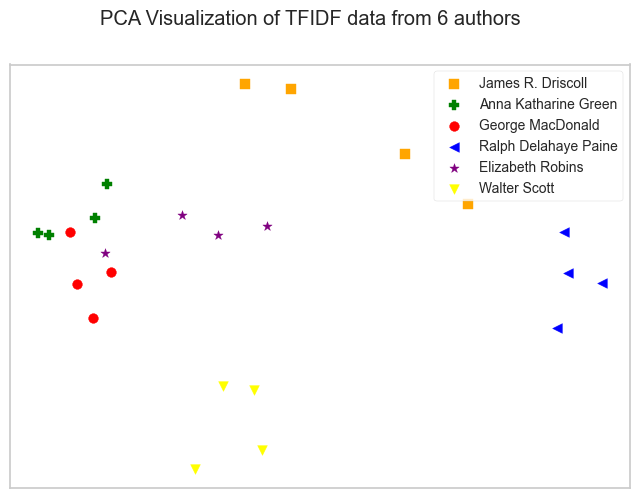

In [9]:
fig, ax = plt.subplots()
i = 0
markers = {}
markers['MacDonald'] = 'o'
markers['Green'] = 'P'
markers['Paine'] = '<'
markers['Scott'] = 'v'
markers['Robins'] = '*'
markers['Driscoll'] = 's'
for pca_result, label in zip(pca_results, labels):
    ax.scatter(pca_result[0], pca_result[1], c=color_map[label], marker=markers[label], label=text_map[label] if i % 4 == 0 else "")
    i += 1
plt.legend(frameon=True)
fig.suptitle('PCA Visualization of TFIDF data from 6 authors')
ax.grid(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

# Part 2 Most Similar Predictions

The top 3 most similar authors based on the visualization (which are Elizabeth Robins, George MacDonald, and Anna Katharine Green) and see how well the prediction models handle guess a new additional book from each author.

# Naive Bayes

In [14]:
directory = 'STraining'
dirs = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory,d))]
corpus = []
labels = []
for directory in dirs: 
    books = os.listdir(f'STraining/{directory}')
    for book in books:
        labels.append(directory)
        all_words = ''
        with open(f'STraining/{directory}/{book}','r',encoding='utf-8') as f:
            for line in f:
                all_words += line
        corpus.append(all_words)

vectorizer = TfidfVectorizer(stop_words='english')
tfid_vect_results = vectorizer.fit_transform(corpus)

In [15]:
# MultinomialNB stands for multinomial Naïve Bayes
clf = MultinomialNB().fit(tfid_vect_results, labels)

In [16]:
books = os.listdir('STesting')
for book in books:
    print(f"For {book}, the predicted author is: ", end='')
    all_words = ''
    with open(f'STesting/{book}', 'r',encoding='utf-8') as f:
        for line in f:
            all_words += line # TfidfVectorizer expects a list of strings
    tfid_vect_results = vectorizer.transform([all_words]) # vectorizer is expecting a list
    prediction = clf.predict(tfid_vect_results)
    print(prediction[0])

For anons_green_book.txt, the predicted author is: Green
For anons_macdonald_book.txt, the predicted author is: MacDonald
For anons_robins_book.txt, the predicted author is: MacDonald


# SVM

In [17]:
directory = 'STraining'
dirs = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory,d))]
corpus = []
labels = []
for directory in dirs: 
    books = os.listdir(f'STraining/{directory}')
    for book in books:
        labels.append(directory)
        all_words = ''
        with open(f'STraining/{directory}/{book}','r',encoding='utf-8') as f:
            for line in f:
                all_words += line
        corpus.append(all_words)

vectorizer = TfidfVectorizer(stop_words='english')
tfid_vect_results = vectorizer.fit_transform(corpus)

In [18]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(corpus, labels)
X_train_Tfidf = vectorizer.transform(X_train)
X_test_Tfidf = vectorizer.transform(X_test)

SVM = svm.SVC(random_state=43)
SVM.fit(X_train_Tfidf,y_train)

SVC(random_state=43)

In [19]:
books = os.listdir('STesting')
for book in books:
    print(f"For {book}, the predicted author is: ", end='')
    all_words = ''
    with open(f'STesting/{book}', 'r',encoding='utf-8') as f:
        for line in f:
            all_words += line # TfidfVectorizer expects a list of strings
    tfid_vect_results = vectorizer.transform([all_words]) # vectorizer is expecting a list
    prediction = SVM.predict(tfid_vect_results)
    print(prediction[0])

For anons_green_book.txt, the predicted author is: Green
For anons_macdonald_book.txt, the predicted author is: MacDonald
For anons_robins_book.txt, the predicted author is: Robins


# Random Forest

In [21]:
directory = 'STraining'
dirs = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory,d))]
corpus = []
labels = []
for directory in dirs: 
    books = os.listdir(f'STraining/{directory}')
    for book in books:
        labels.append(directory)
        all_words = ''
        with open(f'STraining/{directory}/{book}','r',encoding='utf-8') as f:
            for line in f:
                all_words += line
        corpus.append(all_words)

vectorizer = TfidfVectorizer(stop_words='english')
tfid_vect_results = vectorizer.fit_transform(corpus)

In [22]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(corpus, labels)
X_train_Tfidf = vectorizer.transform(X_train)
X_test_Tfidf = vectorizer.transform(X_test)

rf = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
rf.fit(X_train_Tfidf,y_train)

RandomForestClassifier(max_depth=3, n_estimators=200, random_state=0)

In [23]:
books = os.listdir('STesting')
for book in books:
    print(f"For {book}, the predicted author is: ", end='')
    all_words = ''
    with open(f'STesting/{book}', 'r',encoding='utf-8') as f:
        for line in f:
            all_words += line # TfidfVectorizer expects a list of strings
    tfid_vect_results = vectorizer.transform([all_words]) # vectorizer is expecting a list
    prediction = rf.predict(tfid_vect_results)
    print(prediction[0])

For anons_green_book.txt, the predicted author is: MacDonald
For anons_macdonald_book.txt, the predicted author is: MacDonald
For anons_robins_book.txt, the predicted author is: Robins


In [28]:
directory = 'STraining'
dirs = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory,d))]
corpus = []
labels = []
for directory in dirs: 
    books = os.listdir(f'STraining/{directory}')
    for book in books:
        labels.append(directory)
        all_words = ''
        with open(f'STraining/{directory}/{book}','r',encoding='utf-8') as f:
            for line in f:
                all_words += line
        corpus.append(all_words)

vectorizer = TfidfVectorizer(stop_words='english')
tfid_vect_results = vectorizer.fit_transform(corpus)

In [34]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(corpus, labels)
X_train_Tfidf = vectorizer.transform(X_train)
X_test_Tfidf = vectorizer.transform(X_test)

lr = LogisticRegression( solver="lbfgs")
lr.fit(X_train_Tfidf,y_train)

LogisticRegression()

In [35]:
books = os.listdir('STesting')
for book in books:
    print(f"For {book}, the predicted author is: ", end='')
    all_words = ''
    with open(f'STesting/{book}', 'r',encoding='utf-8') as f:
        for line in f:
            all_words += line # TfidfVectorizer expects a list of strings
    tfid_vect_results = vectorizer.transform([all_words]) # vectorizer is expecting a list
    prediction = lr.predict(tfid_vect_results)
    print(prediction[0])

For anons_green_book.txt, the predicted author is: MacDonald
For anons_macdonald_book.txt, the predicted author is: MacDonald
For anons_robins_book.txt, the predicted author is: Robins


# Part 2 Different

For this part the 3 most different authors were grabbed to test the prediction models.

## Naive Bayes

In [73]:
directory = 'DTraining'
dirs = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory,d))]
corpus = []
labels = []
for directory in dirs: 
    books = os.listdir(f'DTraining/{directory}')
    for book in books:
        labels.append(directory)
        all_words = ''
        with open(f'DTraining/{directory}/{book}','r',encoding='utf-8') as f:
            for line in f:
                all_words += line
        corpus.append(all_words)

vectorizer = TfidfVectorizer(stop_words='english')
tfid_vect_results = vectorizer.fit_transform(corpus)

In [74]:
# MultinomialNB stands for multinomial Naïve Bayes
clf = MultinomialNB().fit(tfid_vect_results, labels)

In [75]:
books = os.listdir('DTesting')
for book in books:
    print(f"For {book}, the predicted author is: ", end='')
    all_words = ''
    with open(f'DTesting/{book}', 'r',encoding='utf-8') as f:
        for line in f:
            all_words += line # TfidfVectorizer expects a list of strings
    tfid_vect_results = vectorizer.transform([all_words]) # vectorizer is expecting a list
    prediction = clf.predict(tfid_vect_results)
    print(prediction[0])

For anons_driscoll_book.txt, the predicted author is: Driscoll
For anons_paine_book.txt, the predicted author is: Paine
For anons_scott_book.txt, the predicted author is: Scott


## SVM

In [76]:
directory = 'DTraining'
dirs = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory,d))]
corpus = []
labels = []
for directory in dirs: 
    books = os.listdir(f'DTraining/{directory}')
    for book in books:
        labels.append(directory)
        all_words = ''
        with open(f'DTraining/{directory}/{book}','r',encoding='utf-8') as f:
            for line in f:
                all_words += line
        corpus.append(all_words)

vectorizer = TfidfVectorizer(stop_words='english')
tfid_vect_results = vectorizer.fit_transform(corpus)

In [79]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(corpus, labels)
X_train_Tfidf = vectorizer.transform(X_train)
X_test_Tfidf = vectorizer.transform(X_test)

SVM = svm.SVC()
SVM.fit(X_train_Tfidf,y_train)

SVC()

In [80]:
books = os.listdir('DTesting')
for book in books:
    print(f"For {book}, the predicted author is: ", end='')
    all_words = ''
    with open(f'DTesting/{book}', 'r',encoding='utf-8') as f:
        for line in f:
            all_words += line # TfidfVectorizer expects a list of strings
    tfid_vect_results = vectorizer.transform([all_words]) # vectorizer is expecting a list
    prediction = SVM.predict(tfid_vect_results)
    print(prediction[0])

For anons_driscoll_book.txt, the predicted author is: Driscoll
For anons_paine_book.txt, the predicted author is: Paine
For anons_scott_book.txt, the predicted author is: Scott


In [81]:
directory = 'DTraining'
dirs = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory,d))]
corpus = []
labels = []
for directory in dirs: 
    books = os.listdir(f'DTraining/{directory}')
    for book in books:
        labels.append(directory)
        all_words = ''
        with open(f'DTraining/{directory}/{book}','r',encoding='utf-8') as f:
            for line in f:
                all_words += line
        corpus.append(all_words)

vectorizer = TfidfVectorizer(stop_words='english')
tfid_vect_results = vectorizer.fit_transform(corpus)

In [82]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(corpus, labels)
X_train_Tfidf = vectorizer.transform(X_train)
X_test_Tfidf = vectorizer.transform(X_test)

rf = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
rf.fit(X_train_Tfidf,y_train)

RandomForestClassifier(max_depth=3, n_estimators=200, random_state=0)

In [83]:
books = os.listdir('DTesting')
for book in books:
    print(f"For {book}, the predicted author is: ", end='')
    all_words = ''
    with open(f'DTesting/{book}', 'r',encoding='utf-8') as f:
        for line in f:
            all_words += line # TfidfVectorizer expects a list of strings
    tfid_vect_results = vectorizer.transform([all_words]) # vectorizer is expecting a list
    prediction = rf.predict(tfid_vect_results)
    print(prediction[0])

For anons_driscoll_book.txt, the predicted author is: Driscoll
For anons_paine_book.txt, the predicted author is: Paine
For anons_scott_book.txt, the predicted author is: Scott


In [84]:
directory = 'DTraining'
dirs = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory,d))]
corpus = []
labels = []
for directory in dirs: 
    books = os.listdir(f'DTraining/{directory}')
    for book in books:
        labels.append(directory)
        all_words = ''
        with open(f'DTraining/{directory}/{book}','r',encoding='utf-8') as f:
            for line in f:
                all_words += line
        corpus.append(all_words)

vectorizer = TfidfVectorizer(stop_words='english')
tfid_vect_results = vectorizer.fit_transform(corpus)

In [85]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(corpus, labels)
X_train_Tfidf = vectorizer.transform(X_train)
X_test_Tfidf = vectorizer.transform(X_test)

lr = LogisticRegression( solver="lbfgs")
lr.fit(X_train_Tfidf,y_train)

LogisticRegression()

In [86]:
books = os.listdir('DTesting')
for book in books:
    print(f"For {book}, the predicted author is: ", end='')
    all_words = ''
    with open(f'DTesting/{book}', 'r',encoding='utf-8') as f:
        for line in f:
            all_words += line # TfidfVectorizer expects a list of strings
    tfid_vect_results = vectorizer.transform([all_words]) # vectorizer is expecting a list
    prediction = lr.predict(tfid_vect_results)
    print(prediction[0])

For anons_driscoll_book.txt, the predicted author is: Driscoll
For anons_paine_book.txt, the predicted author is: Paine
For anons_scott_book.txt, the predicted author is: Scott
